In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import numpy as np
import argparse
import math
import sys
import pandas as pd

In [20]:
out_dir = "/home/luca/SDCC/kademlia-nft/plots"
os.makedirs(out_dir, exist_ok=True)

In [21]:
from pathlib import Path
base = Path("SDCC/kademlia-nft/data")
prefix = "node"
start, end = 2, 25

nfile=[]
for t in range(start, end + 1):
    folder = base / f"{prefix}{t}"    # togli "/node" se non serve
    n_json = sum(1 for _ in folder.rglob("*.json")) if folder.exists() else 0
    nfile.append(n_json)
    print(f"{folder}: {n_json} file .json")



ct = 0
for t in nfile:
    if t == 0:
        ct += 1
if ct > 0:
    del nfile[-ct:] 
print(nfile)

print("la somma è:", sum(nfile))

plot_istogramma(nfile)

SDCC/kademlia-nft/data/node2: 71 file .json
SDCC/kademlia-nft/data/node3: 71 file .json
SDCC/kademlia-nft/data/node4: 88 file .json
SDCC/kademlia-nft/data/node5: 97 file .json
SDCC/kademlia-nft/data/node6: 145 file .json
SDCC/kademlia-nft/data/node7: 109 file .json
SDCC/kademlia-nft/data/node8: 93 file .json
SDCC/kademlia-nft/data/node9: 100 file .json
SDCC/kademlia-nft/data/node10: 145 file .json
SDCC/kademlia-nft/data/node11: 97 file .json
SDCC/kademlia-nft/data/node12: 70 file .json
SDCC/kademlia-nft/data/node13: 75 file .json
SDCC/kademlia-nft/data/node14: 68 file .json
SDCC/kademlia-nft/data/node15: 89 file .json
SDCC/kademlia-nft/data/node16: 72 file .json
SDCC/kademlia-nft/data/node17: 66 file .json
SDCC/kademlia-nft/data/node18: 106 file .json
SDCC/kademlia-nft/data/node19: 145 file .json
SDCC/kademlia-nft/data/node20: 88 file .json
SDCC/kademlia-nft/data/node21: 0 file .json
SDCC/kademlia-nft/data/node22: 0 file .json
SDCC/kademlia-nft/data/node23: 0 file .json
SDCC/kademlia-n

'/home/luca/plots/grafico2.png'

In [22]:

def plot_istogramma(
    vec,
    title="Frequenza delle risorse per ciascun nodo con K=3",
    xlabel="Nodi ",
    ylabel="Frequenza",
    name="grafico2.png",
    out_dir="plots",
    x_start_label=2,
    x_range=None,
    show=False
):
    # 1) Prepara cartella e path
    os.makedirs(out_dir, exist_ok=True)
    out_path = os.path.abspath(os.path.join(out_dir, name))

    # 2) Prepara dati (posizioni e etichette)
    n = len(vec)
    positions = np.arange(n)
    labels = np.arange(x_start_label, x_start_label + n)

    # 3) Plot (salveremo PRIMA di eventuale show)
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots()
    sns.barplot(x=positions, y=vec, ax=ax, errorbar=None)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(positions)
    ax.set_xticklabels(labels)

    if x_range is not None:
        left_label, right_label = x_range
        left_pos  = left_label - x_start_label - 0.5
        right_pos = right_label - x_start_label + 0.5
        ax.set_xlim(left_pos, right_pos)
    else:
        ax.set_xlim(-0.5, n - 0.5)

    fig.tight_layout()

    # 4) Salva PRIMA di mostrare
    fig.savefig(out_path, dpi=300, bbox_inches="tight")

    # 5) Verifica
    if not os.path.exists(out_path):
        print(f"⚠️ Non trovato dopo il salvataggio: {out_path}")
    else:
        print(f"✅ Salvato in: {out_path}")

    if show:
        plt.show()
    plt.close(fig)

    return out_path


In [23]:
df = pd.read_csv("/home/luca/SDCC/kademlia-nft/results.csv")

In [32]:
def plot_avg_with_std(df, out_path: str | None):
    x = df["N"].values
    y = df["avg"].values
    s = df["std"].values
    y_low = y - s
    y_high = y + s

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, marker="o", label="media (avg)")
    plt.fill_between(x, y_low, y_high, alpha=0.2, label="banda(std)")
    plt.xlabel("N (numero di nodi)")
    plt.ylabel("Frequenza media per nodo (avg)")
    plt.title("Distribuzione degli NFT al variare dei nodi (K=3)")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.tight_layout()

    if out_path:
        plt.savefig(out_path, dpi=140, bbox_inches="tight")
        print(f"✅ Plot salvato in: {out_path}")
    else:
        plt.show()

✅ Plot salvato in: /home/luca/SDCC/kademlia-nft/plots/avg.png


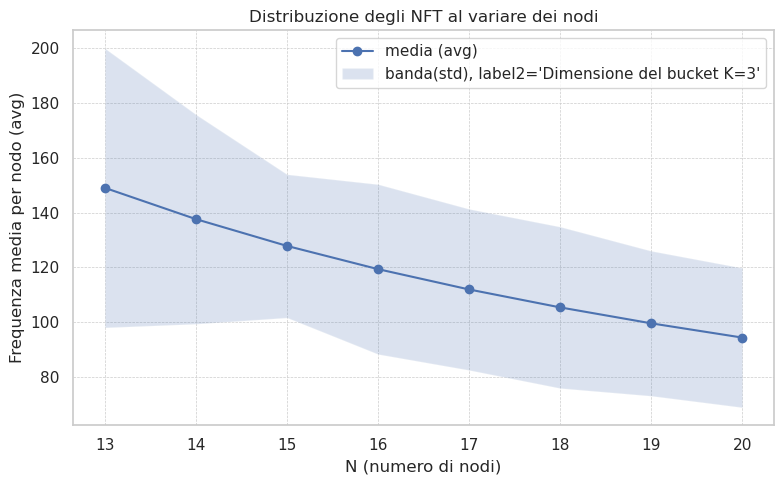

In [30]:
plot_avg_with_std(df,"/home/luca/SDCC/kademlia-nft/plots/avg.png")

In [28]:
df = pd.read_csv("/home/luca/SDCC/kademlia-nft/results/lookup.csv")

In [29]:
hops_series = df.iloc[:, 2]
count = 0
count2 = 0
acc = 0


for t in hops_series:
    if t == -1:
        count += 1
    else:
        acc += t
        count2 += 1

print("Totale NFT cercati:", len(hops_series))
print("Numero di NFT non trovati:", count)
print("Sono stati trovati NFT:", count2)
mean = acc / count2 if count2 > 0 else 0
print("La media degli HOP fatti è:", mean)
print("Sono stati trovati:", count2)
print("Max Hops:", hops_series.max())


Totale NFT cercati: 592
Numero di NFT non trovati: 419
Sono stati trovati NFT: 173
La media degli HOP fatti è: 1.8034682080924855
Sono stati trovati: 173
Max Hops: 6
